#### Evaluation Project -

### Global Power Plant Database

##### Problem Statement:

##### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### Key attributes of the database

The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

#### Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw

In [1]:
# Importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the datafiles and loading the datasets,trying to understand the data.

df=pd.read_csv('Global_Power_Plant_database.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
#knowing the shape of the datasets
df.shape

(907, 27)

They are 907 rows and 27 columns is their in the dataset

In [5]:
#finding the datatypes of each of the columns.
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

#### Key observation :

- 12 object and 13 float variable present in dataset.
- Data is having missing values also in many columns
- for exatct count lets check the null values present in the data.

In [7]:
# Checking any null value present in dataset

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

#### Key observation :
    
- Their are so many missing values present in the dataset.
- latitude and longitude have 46 missing values
- other_fuel1, other_fuel2 and other_fuel3 are having large number of missing values
- commissioning_year year have 380 nul values and oweners information also missing
- wepp_id is completely missing

some of the importtant columns having missing values, we need to drop or fill the colums.

#### Drop all the columns 

In [8]:
#country, country_long are just the name, and here we are data only for india
df.drop(['country', 'country_long'], inplace= True, axis= 1)

In [9]:
# wepp_id, generation_data_source, estimated_generation_gwh also not relevent. having so many Nan values, instead of filling we will drop other_fuel1,other_fuel2, other_fuel3 are also having many Nan values, we will drope them also.
df.drop(['other_fuel1','other_fuel2', 'other_fuel3', 'wepp_id','url','geolocation_source', 'generation_data_source', 'estimated_generation_gwh','source'], inplace= True, axis= 1)

In [10]:
df.drop(['generation_gwh_2013', 'generation_gwh_2019'], inplace= True, axis= 1)

In [11]:
df.drop(['year_of_capacity_data'], inplace= True, axis= 1)

In [12]:
# Filling null values

df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [13]:
df['generation_gwh_2014'].fillna(value=df['generation_gwh_2014'].median(), inplace= True)
df['generation_gwh_2015'].fillna(value=df['generation_gwh_2015'].median(), inplace= True)
df['generation_gwh_2016'].fillna(value=df['generation_gwh_2016'].median(), inplace= True)
df['generation_gwh_2017'].fillna(value=df['generation_gwh_2017'].median(), inplace= True)
df['generation_gwh_2018'].fillna(value=df['generation_gwh_2018'].median(), inplace= True)

In [14]:
df['latitude'].fillna(value=df['latitude'].mean(), inplace= True)
df['longitude'].fillna(value=df['longitude'].mean(), inplace= True) 

In [15]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

## Exploratory Data Analysis (EDA)

#### Univariate analysis

Lets plot the distrubution and conuts for targat and feature columns.

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

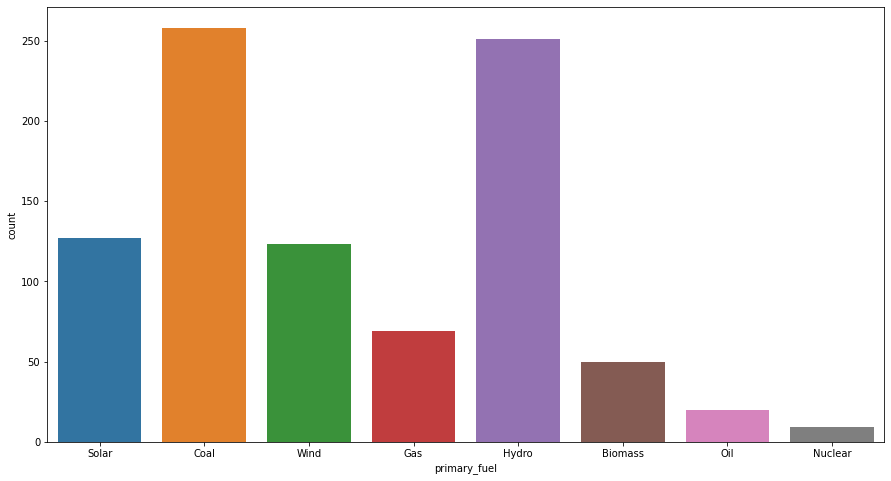

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(df['primary_fuel'] )

#### Key observation:

- Most of the power plants are using Coal and Hydro as the primary fuel.
- Coal having maximum counts, which indicates most of the power generation plant using coal at primary fuel.
- Use of solar and wind also considerable.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, '1927.0'),
  Text(1, 0, '1937.0'),
  Text(2, 0, '1939.0'),
  Text(3, 0, '1943.0'),
  Text(4, 0, '1946.0'),
  Text(5, 0, '1949.0'),
  Text(6, 0, '1952.0'),
  Text(7, 0, '1953.0'),
  Text(8, 0, '1954.0'),
  Text(9, 0, '1955.0'),
  Text(10, 0, '1956.0'),
  Text(11, 0, '1957.0'),
  Text(12, 0, '1958.0'),
  Text(13, 0, '1959.0'),
  Text(14, 0, '1960.0'),
  Text(15, 0, '1961.0'),
  Text(16, 0, '1962.0'),
  Text(17, 0, '1963.0'),
  Text(18, 0, '1964.0'),
  Text(19, 0, '1965.0'),
  Text(20, 0, '1966.0'),
  Text(21, 0, '1967.0'),
  Text(22, 0, '1968.0'),
  Text(23, 0, '1969.0'),
  Text(24, 0, '1970.0'),
  Text(25, 0, '1971.0'),
  Text(26, 0, '1972.0'),
 

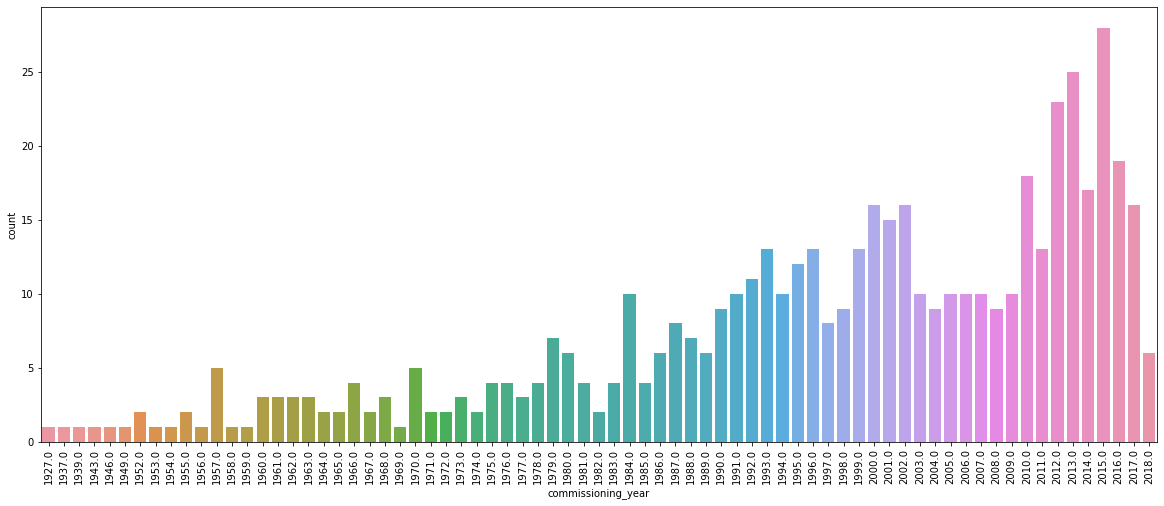

In [24]:
plt.figure(figsize=(20,8))
sns.countplot(df['commissioning_year'])
plt.xticks(rotation=90)

#### Key observation :
- First power plant in India starts in 1927.
- The count is very low till 1956.
- From 1957 to 1983 there is contineous developmet of 3 to 5 power plant every year.
- The number increases 1964 with total count of 10.
- After 1964 there conutineuos growth in power sector.
- In the year 2013 we have maximum number of Power plant, the count is more than 25. 

In [25]:
df['owner'].value_counts()

Acc Acc ltd                                 4
Jk Cement ltd                               4
Sterling Agro Industries ltd.               4
Shri Ssk ltd                                3
Shree Sugars ltd                            3
                                           ..
Kranti Ssk ltd                              1
Mysore Mills ltd                            1
Nuziveedu Seeds limited                     1
ACME Cleantech Solutions Private Limited    1
Sahakar Shiromani vasantrao                 1
Name: owner, Length: 280, dtype: int64

#### Key observation :

- ACC LTD, JK Cement LTD , and Sterling having maximum number (4) of power plants.
- Shri Ssk ltd & Shree Sugars ltd having 3 power plant.
- Other having 2 or only single power plant.

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

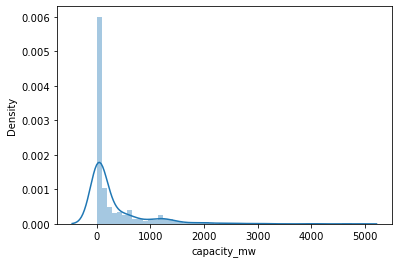

In [27]:
sns.distplot(df['capacity_mw'])

Key observation :
- The probablity of capacity greater than 1000 is less.
- Data is not normaly distributed.
- Data having outliers.

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

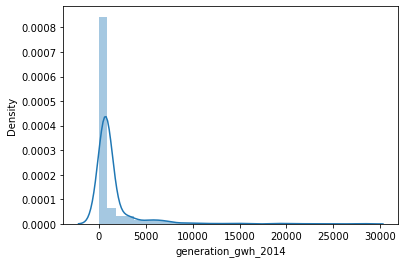

In [30]:
sns.distplot(df['generation_gwh_2014'])

Data is not distributed normally, it is having skewness.

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

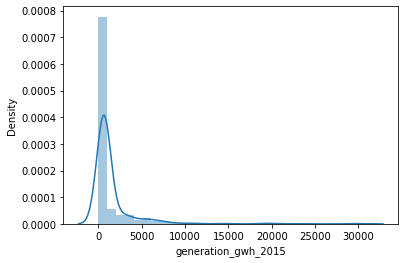

In [31]:
sns.distplot(df['generation_gwh_2015'])

Data is not distributed normally, it is having skewness.

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

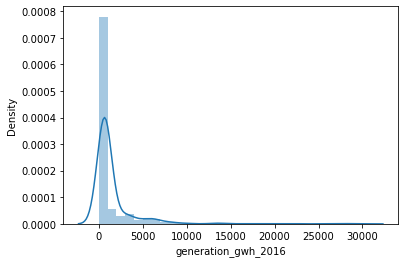

In [32]:
sns.distplot(df['generation_gwh_2016'])

Data is not distributed normally, it is having skewness.

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

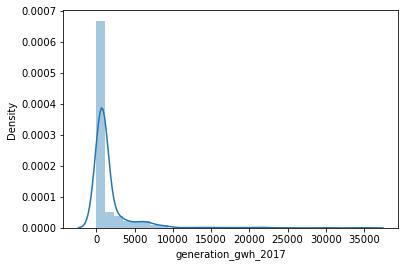

In [33]:
sns.distplot(df['generation_gwh_2017'])

Data is not distributed normally, it is having skewness.

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

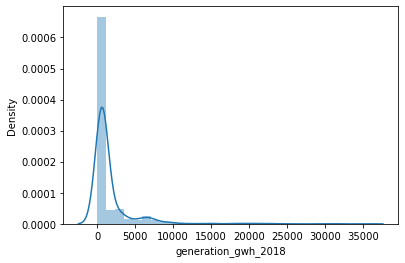

In [34]:
sns.distplot(df['generation_gwh_2018'])

Data is not distributed normally, it is having skewness.

#### Bivariate Analysis

In bivariate analysis, we will analyse the features columns against target column.

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

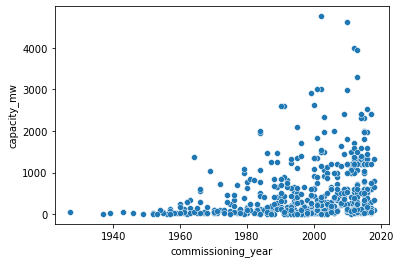

In [36]:
sns.scatterplot(data=df, x='commissioning_year',y='capacity_mw')

Here we can see with increase in the years the devlopment of plants incerases and and capcaity also incresed.

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

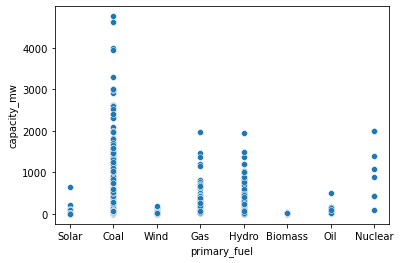

In [37]:
sns.scatterplot(data=df, x='primary_fuel',y='capacity_mw')

We can see most of the power capacity is due to coal.

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

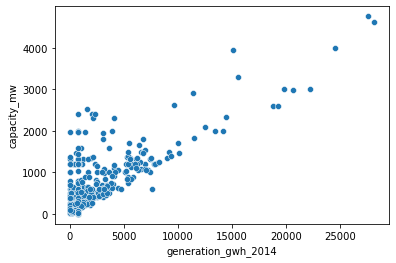

In [39]:
sns.scatterplot(data=df, x='generation_gwh_2014',y='capacity_mw')

With higher capacity, generation_gwh_2014 also incresing.

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

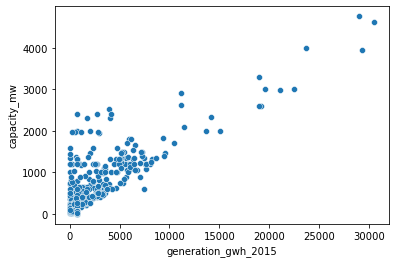

In [40]:
sns.scatterplot(data=df, x='generation_gwh_2015',y='capacity_mw')

With higher capacity, generation_gwh_2015 also incresing.

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

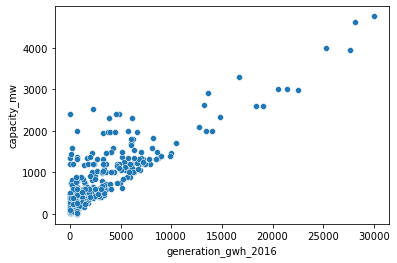

In [41]:
sns.scatterplot(data=df, x='generation_gwh_2016',y='capacity_mw')

With higher capacity, generation_gwh_2016 also incresing.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

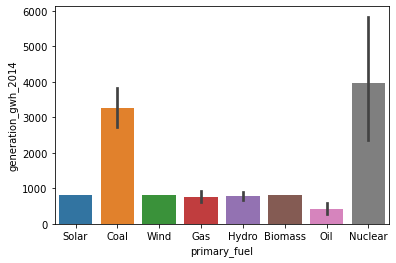

In [43]:
sns.barplot(data=df, x='primary_fuel',y='generation_gwh_2014')

We can see coal is the primary fuel for power generation.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

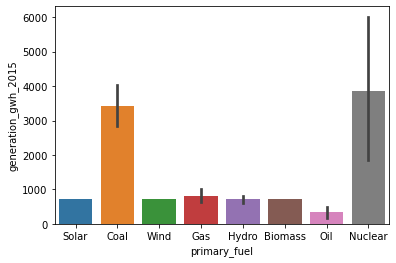

In [44]:
sns.barplot(data=df, x='primary_fuel',y='generation_gwh_2015')

We can see coal is the primary fuel for power generation.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

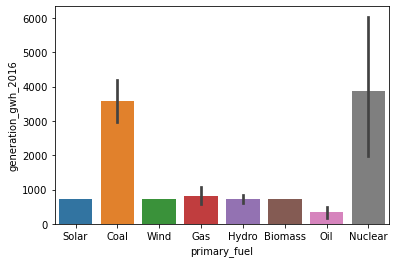

In [45]:
sns.barplot(data=df, x='primary_fuel',y='generation_gwh_2016')

We can see coal is the primary fuel for power generation.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

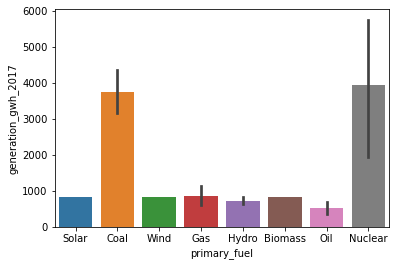

In [46]:
sns.barplot(data=df, x='primary_fuel',y='generation_gwh_2017')

We can see coal is the primary fuel for power generation.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

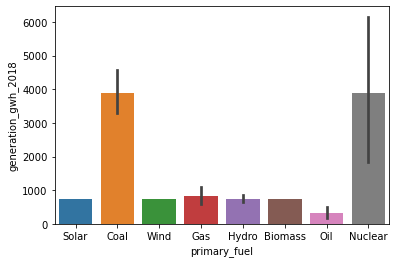

In [48]:
sns.barplot(data=df, x='primary_fuel',y='generation_gwh_2018')

We can see coal is the primary fuel for power generation.

In [49]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,801.123775,711.181225,737.205450,817.977250,751.644375
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,801.123775,711.181225,737.205450,817.977250,751.644375
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,801.123775,711.181225,737.205450,817.977250,751.644375
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,801.123775,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,801.123775,711.181225,737.205450,817.977250,751.644375
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,801.123775,711.181225,737.205450,817.977250,751.644375
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,801.123775,711.181225,737.205450,817.977250,751.644375


### Multivariate analysis

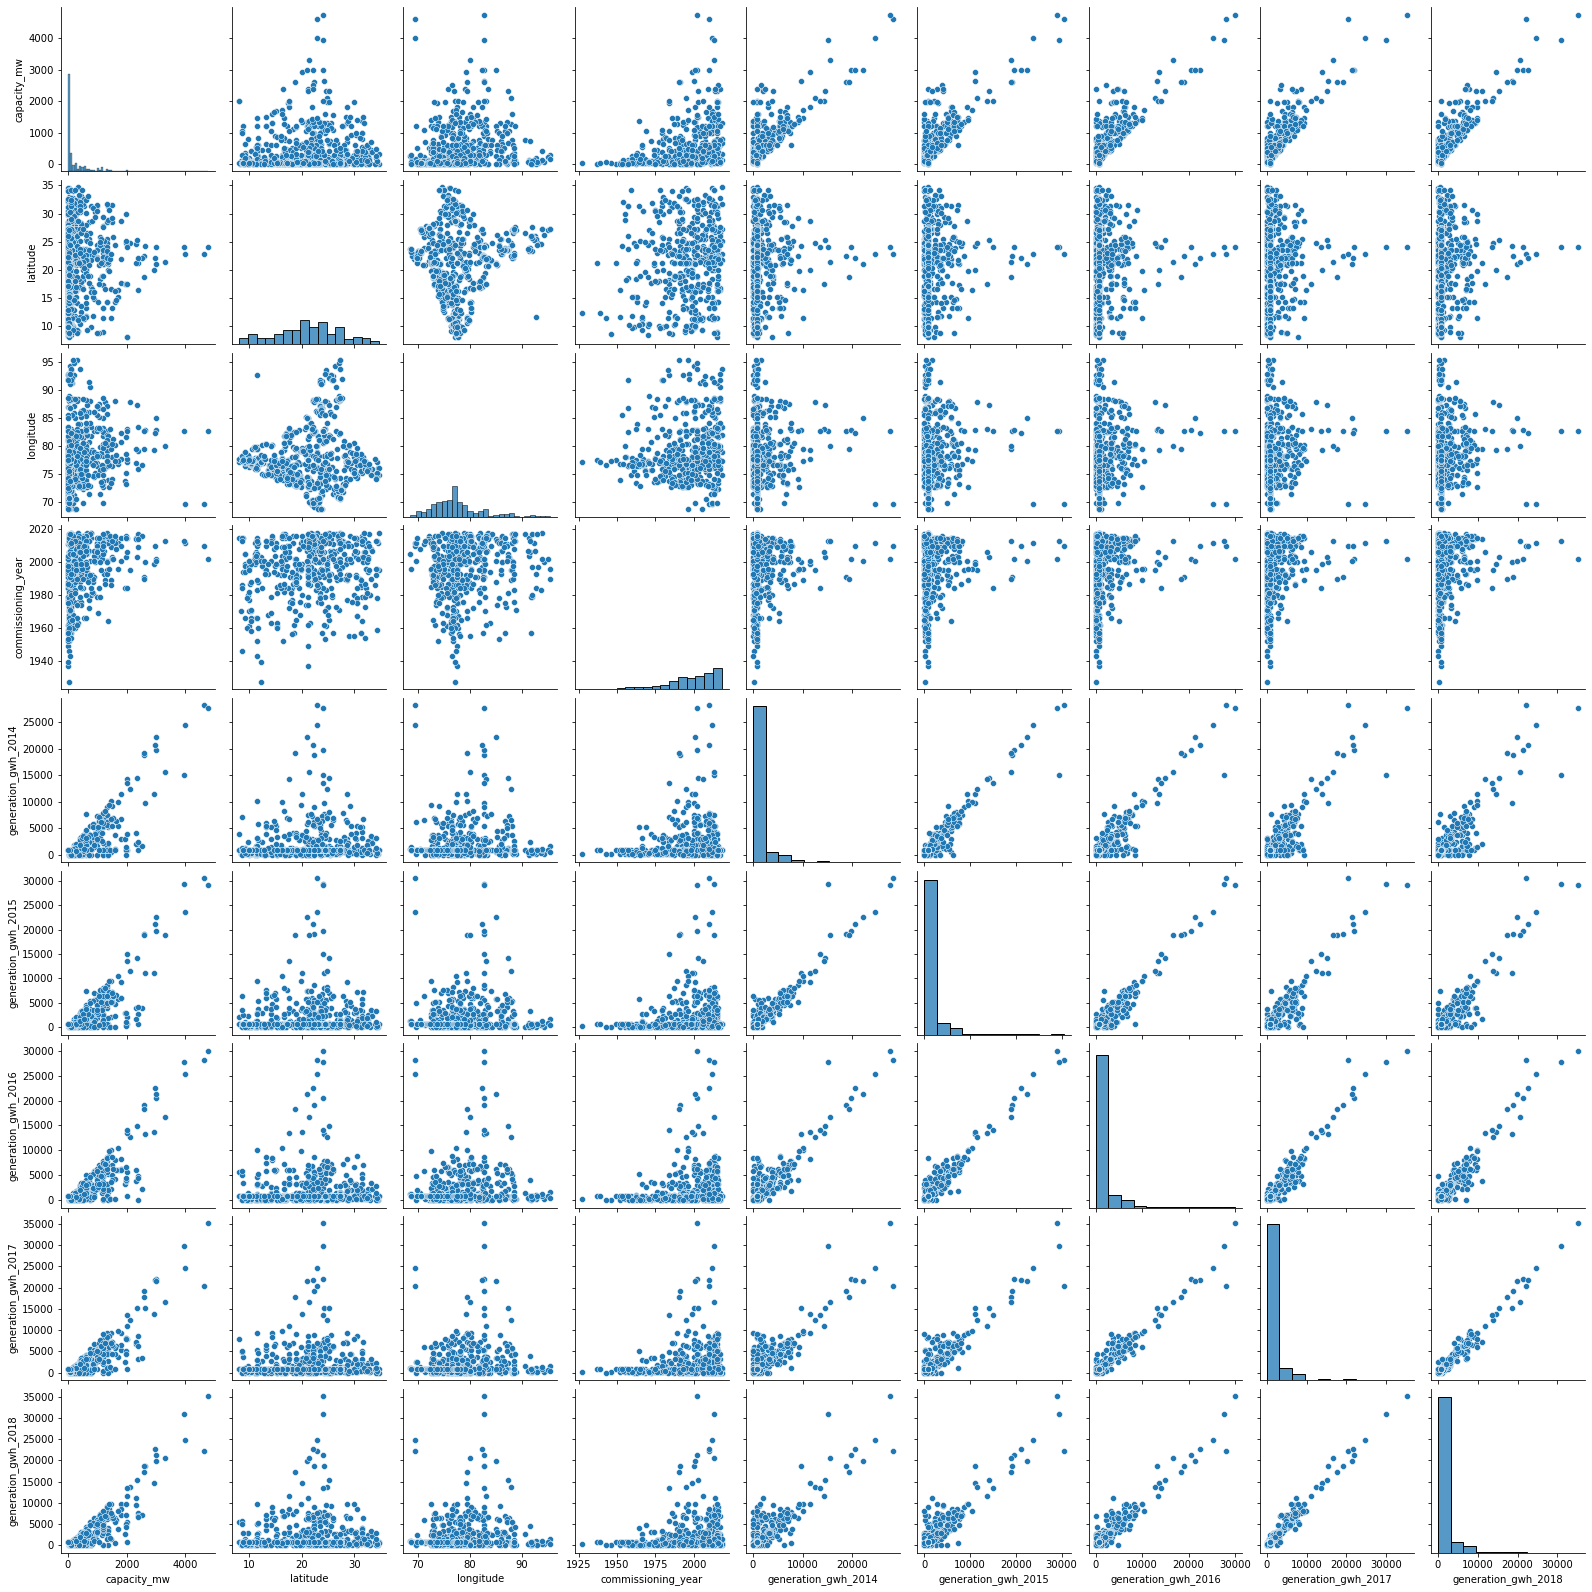

In [50]:
sns.pairplot(df)

#### Key Observation :

- capacity_mw: we can see capacity is mostly dependent on Coal.
- latitude & longitude : They are not playing very good role in capacity_mw.
- primary_fuel: Mostly Coal is used as primary fuel.
- commissioning_year: we can see capacity incerases after 2000.
- generation_gwh_2014-2018: we can see generation growth is almost same for each year

#### Data Processing

Here we can see, name, gppd_idnr, owner, commissioning_year are not playing good role, we can drop these columns.

In [51]:
df.drop(['name','gppd_idnr','owner','commissioning_year'], axis=1, inplace= True)

### Encoding Target columns

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])

In [53]:
df

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1,801.123775,711.181225,737.205450,817.977250,751.644375


### To check Correlation

In [54]:
dfcor=df.corr()
dfcor

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,0.793497,0.819676,0.853008,0.868338,0.884840
latitude,0.050984,1.000000,0.036362,-0.010204,0.058594,0.053869,0.047677,0.057897,0.055216
longitude,0.195882,0.036362,1.000000,-0.347948,0.104649,0.121513,0.143459,0.151712,0.155063
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,-0.240656,-0.249304,-0.259708,-0.263599,-0.271198
generation_gwh_2014,0.793497,0.058594,0.104649,-0.240656,1.000000,0.963719,0.935067,0.904075,0.895143
generation_gwh_2015,0.819676,0.053869,0.121513,-0.249304,0.963719,1.000000,0.973231,0.940229,0.933161
generation_gwh_2016,0.853008,0.047677,0.143459,-0.259708,0.935067,0.973231,1.000000,0.973909,0.964988
generation_gwh_2017,0.868338,0.057897,0.151712,-0.263599,0.904075,0.940229,0.973909,1.000000,0.986685
generation_gwh_2018,0.884840,0.055216,0.155063,-0.271198,0.895143,0.933161,0.964988,0.986685,1.000000


<AxesSubplot:>

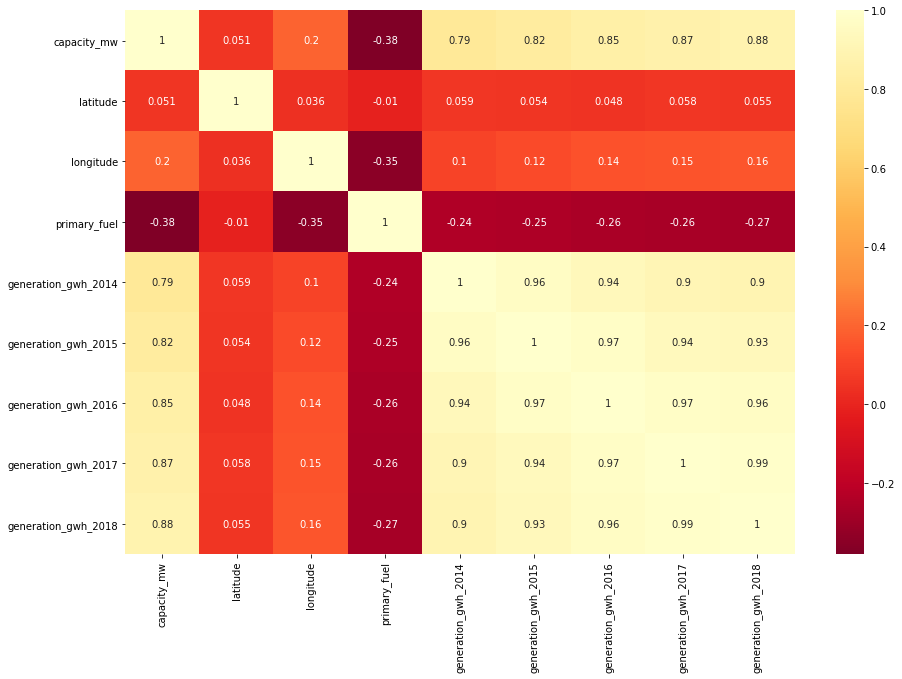

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

### Key observation :
- Primary fuel is highly negative correlated with target class.

<AxesSubplot:>

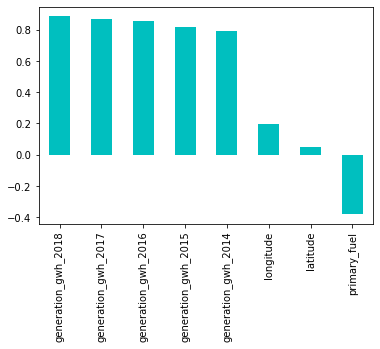

In [56]:
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')

#### Key observation :
- Only primary fuel is negative correlated with capacity megawatt, all othere parameters are having strong positve correlation.

- From heat map we can see generation growth columns are highly correlacted with each other.

#### Checking outliers

<AxesSubplot:>

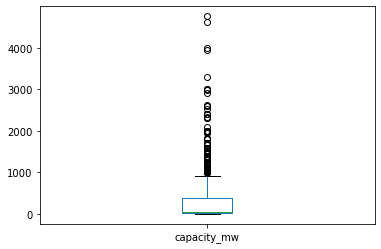

In [59]:
df['capacity_mw'].plot.box()

<AxesSubplot:>

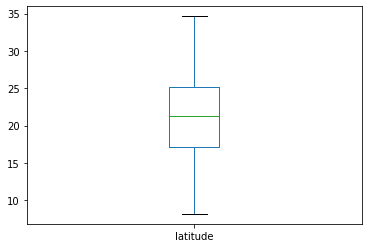

In [60]:
df['latitude'].plot.box()

<AxesSubplot:>

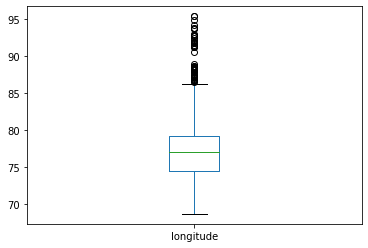

In [61]:
df['longitude'].plot.box()

<AxesSubplot:>

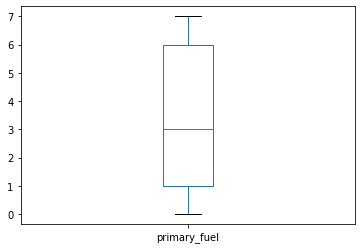

In [62]:
df['primary_fuel'].plot.box()

<AxesSubplot:>

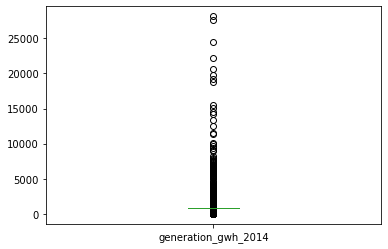

In [63]:
df['generation_gwh_2014'].plot.box()

<AxesSubplot:>

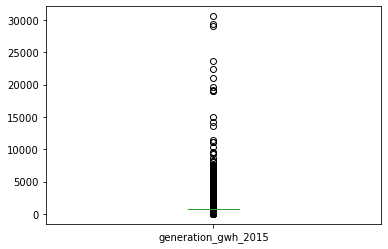

In [64]:
df['generation_gwh_2015'].plot.box()

<AxesSubplot:>

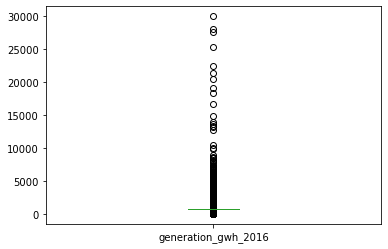

In [65]:
df['generation_gwh_2016'].plot.box()

<AxesSubplot:>

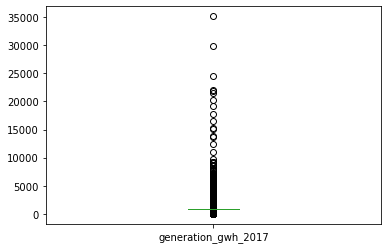

In [66]:
df['generation_gwh_2017'].plot.box()

<AxesSubplot:>

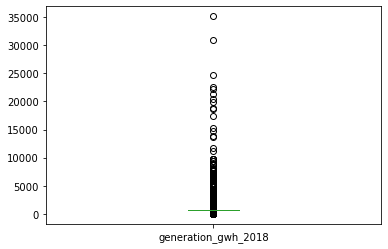

In [67]:
df['generation_gwh_2018'].plot.box()

#### Key observation :
- Here we can see boxplot indicates that we have outliers, these are present mostly in generation_gwh columns.

### Removing Outliers from Data

In [68]:
from scipy.stats import zscore
z= np.abs(zscore(df))

In [69]:
threshold= 3 
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       179, 183, 209, 209, 209, 209, 209, 209, 244, 308, 308, 308, 308,
       308, 308, 323, 333, 340, 360, 363, 364, 364, 364, 364, 364, 364,
       375, 416, 427, 482, 482, 493, 493, 493, 493, 493, 493, 494, 494,
       494, 494, 494, 494, 499, 519, 532, 546, 577, 623, 638, 648, 648,
       648, 648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695,
       695, 695, 695, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724,
       726, 726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 786,
       788, 808, 808, 808, 808, 808, 808, 818, 847, 880, 880, 880, 880,
       880, 880], dtype=int64), array([0, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 0, 4, 2, 2, 0, 4, 5, 6, 7, 8, 2,
       0, 4, 5, 6, 7, 8, 2, 2, 2, 2, 0, 0, 4, 5, 6, 7, 8, 0, 2, 2, 0, 8,
       0, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 2, 2, 4, 2, 2, 4, 2, 0, 4, 5,
       6, 7, 8, 0, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5,
       6, 7, 8, 0, 4, 5, 6,

In [70]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(907, 9)
(866, 9)


In [71]:
# Data loss
Loss_percentage=(908-866)/908*100
print(Loss_percentage)

4.6255506607929515


Data loss is less than 10 percent, we can proceed with new data.

### Transforming Data to Remove skewness:

In [72]:
df_new.skew()

capacity_mw            2.029125
latitude              -0.110925
longitude              0.935570
primary_fuel           0.417203
generation_gwh_2014    2.997212
generation_gwh_2015    2.798104
generation_gwh_2016    2.736037
generation_gwh_2017    2.633766
generation_gwh_2018    2.701508
dtype: float64

In [74]:
from sklearn.preprocessing import power_transform 

# Divide the data into features and vectors.

x=df_new.drop(['capacity_mw'], axis=1)
y=df_new.iloc[:,0]

x=power_transform(x, method='yeo-johnson')

In [75]:
X=pd.DataFrame(data=x)
X

,0,1,2,3,4,5,6,7
0,1.156267,-0.938855,1.141460,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
1,0.591040,-0.519031,-1.017536,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
2,0.121120,-2.379989,1.420068,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
3,0.443736,2.428832,-0.400690,-0.249081,0.115639,0.126619,-0.178492,-0.175228
4,0.130362,1.244663,-1.017536,1.448967,2.320849,2.317527,2.037720,2.431710
...,...,...,...,...,...,...,...,...
861,-0.788809,0.211004,-1.017536,-0.023489,-2.472611,-0.831122,0.034848,-0.105704
862,-1.332201,0.400757,1.141460,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
863,-0.952354,-0.244622,1.420068,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
864,0.522491,-0.778478,-1.017536,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374


### Using StandardScaler

In [76]:
from sklearn.preprocessing import StandardScaler
SDc=StandardScaler()
X=SDc.fit_transform(X)

Our data is now scaled, in next step we will check multicollinearity.

#### Variance Inflation Factor calculation

In [77]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [79]:
df_newx=pd.DataFrame(data=X, columns=['latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'])

In [80]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [81]:
calc_vif(df_newx)

,variables,VIF FACTOR
0,latitude,1.023721
1,longitude,1.174497
2,primary_fuel,1.194083
3,generation_gwh_2014,3.576558
4,generation_gwh_2015,6.279617
5,generation_gwh_2016,10.757296
6,generation_gwh_2017,9.758001
7,generation_gwh_2018,9.231482


In [82]:
df_newx.drop('generation_gwh_2016', axis=1, inplace=True )

In [83]:
calc_vif(df_newx)

,variables,VIF FACTOR
0,latitude,1.020927
1,longitude,1.168939
2,primary_fuel,1.193304
3,generation_gwh_2014,3.573753
4,generation_gwh_2015,4.377615
5,generation_gwh_2017,8.513010
6,generation_gwh_2018,8.635154


In [84]:
x=df_newx

VIF is less than 10 we can proceed for model development

### Splitting the DataFrame:

In [85]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#### LinearRegression

In [86]:
lr=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= i,test_size=0.30)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random state",i, "The model perform very well")
        print("At random State:",i)
        print("Training r2_score",r2_score(y_train,pred_train)*100)
        print("Testing r2 score ",r2_score(y_test,pred_test)*100)
        print(" ")

At Random state 96 The model perform very well
At random State: 96
Training r2_score 45.552748713081904
Testing r2 score  45.55576316319012
 
At Random state 211 The model perform very well
At random State: 211
Training r2_score 43.81217321475886
Testing r2 score  43.77991099177926
 
At Random state 287 The model perform very well
At random State: 287
Training r2_score 45.5415177481834
Testing r2 score  45.494502012273294
 
At Random state 442 The model perform very well
At random State: 442
Training r2_score 44.87000402145279
Testing r2 score  44.92892361247204
 
At Random state 500 The model perform very well
At random State: 500
Training r2_score 45.60919560136093
Testing r2 score  45.58614649426692
 
At Random state 591 The model perform very well
At random State: 591
Training r2_score 45.466459513823374
Testing r2 score  45.54672006779953
 
At Random state 711 The model perform very well
At random State: 711
Training r2_score 44.80761088199191
Testing r2 score  44.84865309140845
 

At random State: 500

Training r2_score 45.60919560136093

Testing r2 score  45.58614649426692

In [87]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y, test_size=0.30, random_state= 500)

In [88]:
lr.fit(x_train_b,y_train_b)
pred_test=lr.predict(x_test_b)

print('Linear model accuracy is: ',r2_score(y_test_b,pred_test))

Linear model accuracy is:  0.4558614649426692


### Cross Validation

In [90]:
test_accuracy= r2_score(y_test_b,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")
    print(" ")

At cross fold 2 the Cross Val score is 41.60310493874137 and Accuracy score is 45.58614649426692
 
At cross fold 3 the Cross Val score is 39.12520581234575 and Accuracy score is 45.58614649426692
 
At cross fold 4 the Cross Val score is 40.98157821197042 and Accuracy score is 45.58614649426692
 
At cross fold 5 the Cross Val score is 41.78454669720139 and Accuracy score is 45.58614649426692
 
At cross fold 6 the Cross Val score is 41.378193080855816 and Accuracy score is 45.58614649426692
 
At cross fold 7 the Cross Val score is 38.22701959830313 and Accuracy score is 45.58614649426692
 
At cross fold 8 the Cross Val score is 40.77634212464085 and Accuracy score is 45.58614649426692
 
At cross fold 9 the Cross Val score is 39.73696089997593 and Accuracy score is 45.58614649426692
 


At cross fold 5 the Cross Val score is 41.78454669720139 and Accuracy score is 45.58614649426692

In [91]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_test))
print('Mean Squared Error:', mean_squared_error(y_test_b,pred_test))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,pred_test)))

Error:
Mean Absolute Error: 229.26395626546974
Mean Squared Error: 95427.06107898547
Root Mean Square Error: 308.9127078625699


We can see cv score is very low, But it is having less diffrence with respect to other cv.
So we can take cv=8, But model performance is low, lets try anaother model.

#### Lasso

In [93]:
ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,y,cv=8,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100)

R2 score: 45.626084852041814
Cross val Score : 40.9805029758539


In [94]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 229.2365494658674
Mean Squared Error: 95357.02009013365
Root Mean Square Error: 308.79932009337983


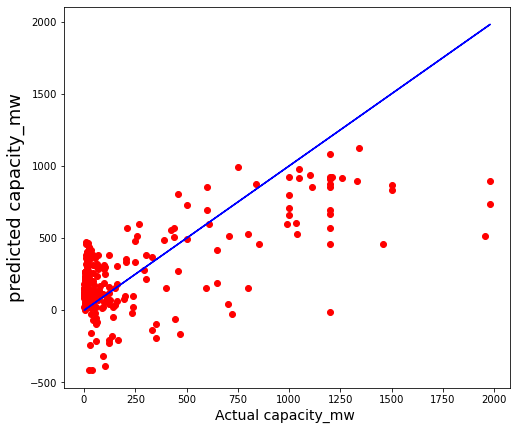

In [95]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= ls_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw ', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

#### Ridge

In [96]:
rd= Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,y,cv=8, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  45.58210053297991
Cross val Score 40.801179676733355


In [97]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 229.28197703333035
Mean Squared Error: 95434.15659180039
Root Mean Square Error: 308.9241923058154


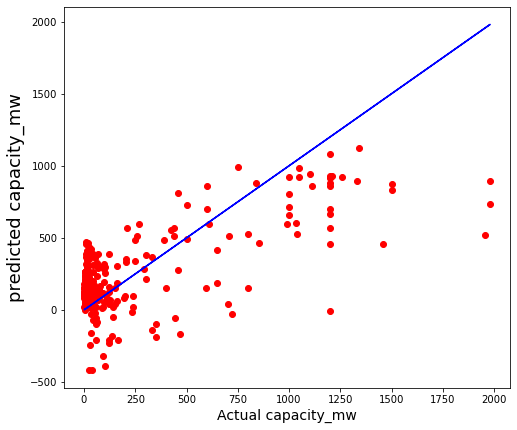

In [98]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rd_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

#### Decision TreeRegressor

In [99]:
dt=DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,y,cv=8, scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 71.43432177900118
Cross Val Score: 63.602916852102986


In [100]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 108.75352637362639
Mean Squared Error: 50096.41010024573
Root Mean Square Error: 223.82227346769074


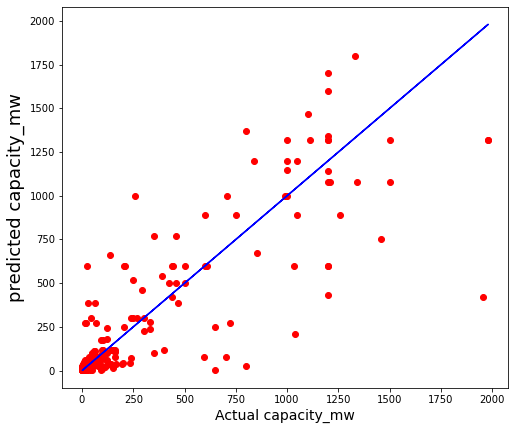

In [101]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= dt_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

#### KNeighborsRegressor

In [103]:
kn=KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score:', kn_score*100)

kn_cvscore=cross_val_score(kn,x,y, cv=8, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 75.11513777271803
Cross val Score : 74.45492309132239


In [104]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 102.88324153846155
Mean Squared Error: 43641.26255926308
Root Mean Square Error: 208.90491272170476


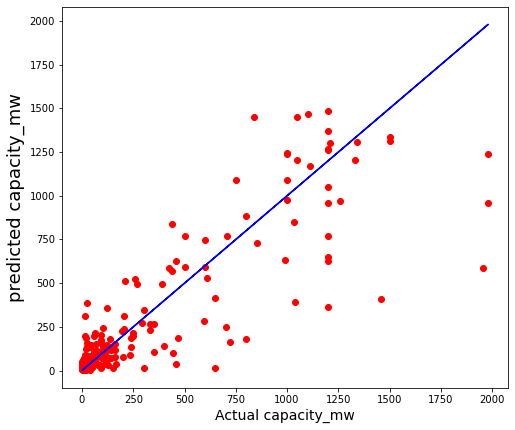

In [105]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= kn_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

#### RandomForestRegressor

In [106]:
rf=RandomForestRegressor()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=8, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 79.43459855171942
Cross val Score : 77.84156636146571


In [107]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 95.62179067604562
Mean Squared Error: 36066.10621525193
Root Mean Square Error: 189.91078488398685


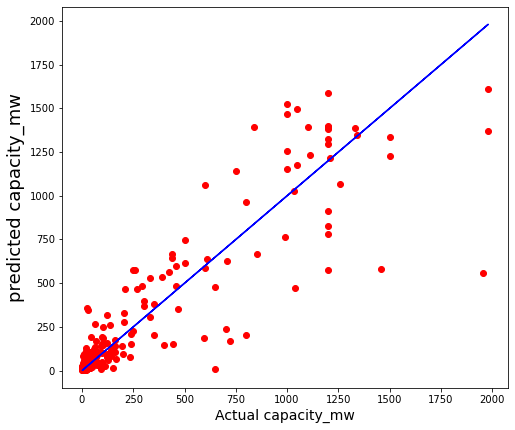

In [108]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rf_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

#### GradientBoostingRegressor

In [109]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,y, cv=8, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 79.43459855171942
Cross val Score : 72.38649785671953


In [110]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Error:
Mean Absolute Error: 95.62179067604562
Mean Squared Error: 36066.10621525193
Root Mean Square Error: 189.91078488398685


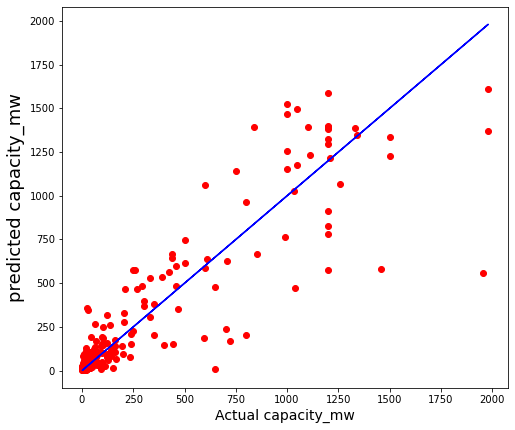

In [111]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= gb_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

RandomForestRegressor is stil the best model with R2 score: 78.9091 Cross val Score : 77.6367, lets try Hypertuning of the model.

#### Hyper Parameter Tuning

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
parameters={'criterion':['mse', 'absolute_error','squared_error','poisson'],'max_features':['auto', 'sqrt', 'log2'],'n_estimators':[100,200,300,400,500], 'min_samples_split':[1,2,3,4,10]}
rf=RandomForestRegressor()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'squared_error', 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 100}


In [115]:
rf=RandomForestRegressor(criterion='poisson', max_features='sqrt', min_samples_split=2, n_estimators=300)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=8, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100)

R2 score: 81.02836305914953
Cross val Score : 79.07628027001361


##### We can see RandomForestRegressor Having very less diffrence in R2 score and Cross Val Score. we can consider this our best model.

### Model Saving:

In [116]:
import pickle
filename='Global_Power_Plant_Database_Evaluation_project_1.pkl'
pickle.dump(rf,open(filename,'wb'))

In [117]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rf.predict(x_test_b))
df_new_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_new_com

,original,predicted
0,5.80,25.333111
1,20.00,13.761333
2,18.90,114.795533
3,75.00,41.162511
4,34.00,77.611333
...,...,...
255,468.57,337.170033
256,5.00,33.033444
257,10.00,5.908333
258,207.00,322.204257


### Prediction of the primary fuel

In [118]:
df_new

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1,801.123775,711.181225,737.205450,817.977250,751.644375


In [120]:
# deviding into fetures and target.

x=df_new.drop('primary_fuel', axis=1)
y=df_new['primary_fuel']

In [121]:
x.skew()

capacity_mw            2.029125
latitude              -0.110925
longitude              0.935570
generation_gwh_2014    2.997212
generation_gwh_2015    2.798104
generation_gwh_2016    2.736037
generation_gwh_2017    2.633766
generation_gwh_2018    2.701508
dtype: float64

In [122]:
from sklearn.preprocessing import power_transform 
x=power_transform(x, method='yeo-johnson')

In [123]:
X2=pd.DataFrame(data=x)

#### Scaling the data Using StandardScaler.

In [125]:
SDc=StandardScaler()
X2=SDc.fit_transform(X2)
X2

array([[-1.6833227 ,  1.15626742, -0.93885467, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [ 0.24978411,  0.59104013, -0.51903111, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [-0.25138397,  0.12112001, -2.37998905, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       ...,
       [-0.48802138, -0.95235366, -0.24462176, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [ 0.13943645,  0.52249096, -0.77847826, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [-0.72678912, -1.79828311,  0.23982923, ..., -0.02668675,
        -0.0118393 , -0.03537354]])

Our data is now scaled, in next step we will check multicollinearity.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
df_new.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [131]:
df_newy=pd.DataFrame(data=X2, columns=['capacity_mw','latitude', 'longitude',
        'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018'])

In [132]:
df_newy

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.683323,1.156267,-0.938855,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
1,0.249784,0.591040,-0.519031,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
2,-0.251384,0.121120,-2.379989,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
3,0.422961,0.443736,2.428832,-0.249081,0.115639,0.126619,-0.178492,-0.175228
4,1.768702,0.130362,1.244663,1.448967,2.320849,2.317527,2.037720,2.431710
...,...,...,...,...,...,...,...,...
861,1.709760,-0.788809,0.211004,-0.023489,-2.472611,-0.831122,0.034848,-0.105704
862,-1.602083,-1.332201,0.400757,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
863,-0.488021,-0.952354,-0.244622,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
864,0.139436,0.522491,-0.778478,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374


In [130]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [133]:
calc_vif(df_newy)

,variables,VIF FACTOR
0,capacity_mw,1.279531
1,latitude,1.024334
2,longitude,1.148649
3,generation_gwh_2014,3.582231
4,generation_gwh_2015,6.286462
5,generation_gwh_2016,10.754176
6,generation_gwh_2017,9.760924
7,generation_gwh_2018,9.241425


In [136]:
df_newy.drop('generation_gwh_2016', axis=1, inplace=True)

In [137]:
calc_vif(df_newy)

,variables,VIF FACTOR
0,capacity_mw,1.279067
1,latitude,1.021700
2,longitude,1.142608
3,generation_gwh_2014,3.579527
4,generation_gwh_2015,4.384862
5,generation_gwh_2017,8.516949
6,generation_gwh_2018,8.647218


In [138]:
x=df_newy

### Model Development

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

### Chosing Best Random State

In [140]:
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test,pred_test)*100)
        print(" ")

At Random state  163 The Model performing Well
At Random State 163
Training Accuracy score is- 51.73410404624278
Testing Accuracy Score is- 51.724137931034484
 
At Random state  810 The Model performing Well
At Random State 810
Training Accuracy score is- 51.73410404624278
Testing Accuracy Score is- 51.724137931034484
 


At Random State 163
Training Accuracy score is- 51.73410404624278
Testing Accuracy Score is- 51.724137931034484

In [141]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=5,test_size=0.20)

In [142]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))

0.4885057471264368


In [143]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[ 0  0  0  1  0  0  0  6]
 [ 0 18  1 17  0  0  1  4]
 [ 0  6  4  2  0  1  0  0]
 [ 0  8  0 32  0  0  6  5]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  2  0  1  0  2]
 [ 0  0  0  7  0  0 15  5]
 [ 0  1  0  5  0  0  8 15]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.53      0.44      0.48        41
           2       0.80      0.31      0.44        13
           3       0.48      0.63      0.55        51
           4       0.00      0.00      0.00         1
           5       0.50      0.20      0.29         5
           6       0.50      0.56      0.53        27
           7       0.41      0.52      0.45        29

    accuracy                           0.49       174
   macro avg       0.40      0.33      0.34       174
weighted avg       0.49      0.49      0.47       174



### Cross validation of model

In [144]:
lr_pred=lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j, scoring='accuracy')
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print(" ")

at cv:- 2
Cross Validation scre is:- 49.07621247113164
Accuracy Score:- 48.85057471264368
 
at cv:- 3
Cross Validation scre is:- 49.534233628091755
Accuracy Score:- 48.85057471264368
 
at cv:- 4
Cross Validation scre is:- 49.53490356716163
Accuracy Score:- 48.85057471264368
 
at cv:- 5
Cross Validation scre is:- 50.804597701149426
Accuracy Score:- 48.85057471264368
 
at cv:- 6
Cross Validation scre is:- 50.569923371647505
Accuracy Score:- 48.85057471264368
 
at cv:- 7
Cross Validation scre is:- 51.143643924918514
Accuracy Score:- 48.85057471264368
 
at cv:- 8
Cross Validation scre is:- 51.14572714916752
Accuracy Score:- 48.85057471264368
 
at cv:- 9
Cross Validation scre is:- 50.79944635357007
Accuracy Score:- 48.85057471264368
 


But still need improvement
Lets try another model

### SVC

In [145]:
svc=SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=8, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 59.195402298850574
Cross val Score : 59.80610771321781


In [146]:
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

[[ 0  0  0  0  0  0  0  7]
 [ 0 31  1  2  0  0  2  5]
 [ 0  6  3  3  0  1  0  0]
 [ 0  8  0 34  0  0  2  7]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  2  0  0  0  0  2]
 [ 0  2  0  3  0  0 13  9]
 [ 0  2  0  1  0  0  4 22]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.61      0.76      0.67        41
           2       0.50      0.23      0.32        13
           3       0.79      0.67      0.72        51
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.62      0.48      0.54        27
           7       0.42      0.76      0.54        29

    accuracy                           0.59       174
   macro avg       0.37      0.36      0.35       174
weighted avg       0.58      0.59      0.57       174



#### KNeighborsClassifier

In [147]:
kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=8, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 64.36781609195403
Cross val Score : 65.36697247706422


In [148]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[ 6  0  0  0  0  0  0  1]
 [ 1 32  0  3  0  0  1  4]
 [ 0  6  1  4  0  2  0  0]
 [ 1  5  0 36  0  0  1  8]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  1  2  0  1  0  0]
 [ 1  3  0  4  0  0 15  4]
 [ 1  0  2  1  0  0  4 21]]
              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.67      0.78      0.72        41
           2       0.25      0.08      0.12        13
           3       0.72      0.71      0.71        51
           4       0.00      0.00      0.00         1
           5       0.33      0.20      0.25         5
           6       0.71      0.56      0.63        27
           7       0.55      0.72      0.63        29

    accuracy                           0.64       174
   macro avg       0.48      0.49      0.47       174
weighted avg       0.62      0.64      0.62       174



#### DecisionTreeClassifier

In [149]:
dt=DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=8, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 65.51724137931035
Cross val score is: 63.74129289840299


In [150]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[ 3  1  1  0  0  0  0  2]
 [ 2 29  2  4  0  1  0  3]
 [ 0  4  8  0  0  1  0  0]
 [ 3  5  0 36  0  2  0  5]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  0  0  4  0  0]
 [ 2  5  0  3  0  0 15  2]
 [ 1  1  0  5  0  0  3 19]]
              precision    recall  f1-score   support

           0       0.27      0.43      0.33         7
           1       0.63      0.71      0.67        41
           2       0.67      0.62      0.64        13
           3       0.75      0.71      0.73        51
           4       0.00      0.00      0.00         1
           5       0.50      0.80      0.62         5
           6       0.83      0.56      0.67        27
           7       0.61      0.66      0.63        29

    accuracy                           0.66       174
   macro avg       0.53      0.56      0.54       174
weighted avg       0.67      0.66      0.66       174



#### RandomForestClassifier

In [151]:
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=8, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  71.83908045977012
Cross val Score : 71.70935270132517


In [152]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[ 6  0  0  0  0  0  0  1]
 [ 2 31  1  4  0  1  1  1]
 [ 0  5  4  3  0  1  0  0]
 [ 2  5  0 38  0  0  1  5]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  2  0  0  3  0  0]
 [ 1  1  0  3  0  0 19  3]
 [ 1  0  0  2  0  0  2 24]]
              precision    recall  f1-score   support

           0       0.50      0.86      0.63         7
           1       0.72      0.76      0.74        41
           2       0.57      0.31      0.40        13
           3       0.76      0.75      0.75        51
           4       0.00      0.00      0.00         1
           5       0.60      0.60      0.60         5
           6       0.83      0.70      0.76        27
           7       0.71      0.83      0.76        29

    accuracy                           0.72       174
   macro avg       0.59      0.60      0.58       174
weighted avg       0.72      0.72      0.71       174



#### AdaBoostClassifier

In [153]:
ad=AdaBoostClassifier()
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=8, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  37.93103448275862
Cross val Score : 34.87618926265716


In [154]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[ 0  0  0  0  0  0  7  0]
 [ 0 18  0  7  2  2 12  0]
 [ 0  2  0  6  2  2  1  0]
 [ 0  7  0 21  0  0 23  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  1  0  2  1  0]
 [ 0  0  0  2  0  0 25  0]
 [ 0  0  0  4  0  0 25  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.64      0.44      0.52        41
           2       0.00      0.00      0.00        13
           3       0.51      0.41      0.46        51
           4       0.00      0.00      0.00         1
           5       0.33      0.40      0.36         5
           6       0.27      0.93      0.41        27
           7       0.00      0.00      0.00        29

    accuracy                           0.38       174
   macro avg       0.22      0.27      0.22       174
weighted avg       0.35      0.38      0.33       174



#### GaussianNB

In [155]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=8, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 53.44827586206896
Cross Val Score is : 53.58583927964662


#### Hyperparameter Tuning

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators' : [100, 300,400, 500, 800, 1200], 'criterion':['gini', 'entropy'], 'max_features':['auto','sqrt', 'log2'], 'min_samples_split':[2, 5, 10, 15, 100],'max_depth':[5, 8, 15, 25, 30] }
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'gini', 'max_depth': 25, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}


In [158]:
rf=RandomForestClassifier(criterion='entropy',max_depth=25, max_features='sqrt', min_samples_split=5, n_estimators=1200 )
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=8,scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  72.98850574712644
Cross val Score : 72.75101936799184


##### RandomForestClassifier with accuracy_score: 71.83908045977012 Cross val Score : 71.70935270132517 is our best model.

In [159]:
import pickle
filename="Evaluation_Project-Global_Power_Plant_Database_logic.pkl "
pickle.dump(dt, open(filename,'wb'))

In [160]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rf.predict(x_test_b))
df_new_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_new_com

,original,predicted
0,2,1
1,3,1
2,3,1
3,7,3
4,3,3
...,...,...
169,7,7
170,3,0
171,3,6
172,6,7
